# Logistic Regression

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Link for the dataset: https://www.kaggle.com/datasets/rouseguy/bankbalanced

# Cleaning and modifying data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# pipeline features
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

In [3]:
# uploading dataset to juputer notebook
df = pd.read_csv("bank.csv")

In [4]:
# let's read data
df.head()

# I checked from this link https://archive.ics.uci.edu/dataset/222/bank+marketing
# what some of columns mean (their definition and values)

# default --> has credit in default? (binary: "yes","no")
# duration --> last contact duration, in seconds (numeric)
# campaign --> number of contacts performed during this campaign 
# and for this client (numeric, includes last contact)
# pdays --> number of days that passed by after the client was last contacted 
# from a previous campaign (numeric, -1 means client was not previously contacted)
# previous --> number of contacts performed before this campaign and for this client (numeric)
# poutcome --> outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# let see how many values we have
# to compare them after the cleaning part
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## My clean data plan:
1. Check all NaN values --> delete if there are 
2. Check duplicates --> delete if there are 
----------
3. Check the job column --> use clustering or other methods to modify it into numeric
4. marital column --> OneHotEncoder
5. education column --> OneHotEncoder
6. default column --> LabelEncoder
7. housing column --> LabelEncoder
8. loan column --> LabelEncoder
9. contact column --> OneHotEncoder 
10. month column --> use clustering or other methods to modify it into numeric
11. poutcome column --> OneHotEncoder 
12. deposit column --> LabelEncoder
----------
13. Remove outliers by checking balance of these columns

In [6]:
# 1. Check all NaN values --> delete if there are 
df.isna().sum()

# suprisingly, zero :)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
# 2. Check duplicates --> delete if there are 
# let's check whether we have duplicates
# or one more surprise awaiting us :)
df.duplicated().sum()

# yes, life is full of surprises :)

0

In [8]:
# 3. Check the job column --> use clustering or other methods to modify it into numeric

# type of job (categorical: 'admin.','blue-collar','entrepreneur',
# 'housemaid','management','retired','self-employed','services','student',
# 'technician','unemployed','unknown')

# overwriting the 'job' column with the encoded values

# the package that needed to be installed
# in order to modify data into numeric
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform 'job' column
df['job'] = label_encoder.fit_transform(df['job'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
admin.: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
unknown: 11


In [9]:
# Modifying columns with OneHotEncoder
# 4. marital column --> OneHotEncoder

# fit LabelEncoder and transform 'job' column
df['marital'] = label_encoder.fit_transform(df['marital'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
divorced: 0
married: 1
single: 2


In [10]:
# 5. education column --> OneHotEncoder
df['education'] = label_encoder.fit_transform(df['education'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
primary: 0
secondary: 1
tertiary: 2
unknown: 3


In [11]:
# 9. contact column --> OneHotEncoder 
df['contact'] = label_encoder.fit_transform(df['contact'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
cellular: 0
telephone: 1
unknown: 2


In [12]:
# 11. poutcome column --> OneHotEncoder 
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
failure: 0
other: 1
success: 2
unknown: 3


In [13]:
# verify the transformation
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,no,2343,yes,no,2,5,may,1042,1,-1,0,3,yes
1,56,0,1,1,no,45,no,no,2,5,may,1467,1,-1,0,3,yes
2,41,9,1,1,no,1270,yes,no,2,5,may,1389,1,-1,0,3,yes
3,55,7,1,1,no,2476,yes,no,2,5,may,579,1,-1,0,3,yes
4,54,0,1,2,no,184,no,no,2,5,may,673,2,-1,0,3,yes


In [14]:
# 10. month column --> use clustering or other methods to modify it into numeric
# Define a dictionary mapping each month to its numeric representation
month_to_number = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Map the 'month' column to its corresponding numeric representation
df['month'] = df['month'].map(month_to_number)

# I used this method in order to avoid creating additional columns

In [15]:
# checking whether everything worked in the correct way
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,no,2343,yes,no,2,5,5,1042,1,-1,0,3,yes
1,56,0,1,1,no,45,no,no,2,5,5,1467,1,-1,0,3,yes
2,41,9,1,1,no,1270,yes,no,2,5,5,1389,1,-1,0,3,yes
3,55,7,1,1,no,2476,yes,no,2,5,5,579,1,-1,0,3,yes
4,54,0,1,2,no,184,no,no,2,5,5,673,2,-1,0,3,yes


In [16]:
# All columns that need the same method can be done in one step
# 6. default column --> LabelEncoder
# 7. housing column --> LabelEncoder
# 8. loan column --> LabelEncoder
# 12. deposit column --> LabelEncoder

# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['default', 'housing', 'loan', 'deposit']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,5,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,5,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,5,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,5,673,2,-1,0,3,1


In [18]:
# 13. Remove outliers
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,6.190826,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,2.572792,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,5.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


In [19]:
# I have too many columns to check balannce of every column separetaly
# that is why I will use Z-score and IQR methods
# to check all columns at the same time

# Function to detect outliers using Z-score method
def detect_outliers_zscore(df, threshold=3):
    outliers = pd.DataFrame()
    for col in df.columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        col_outliers = df[z_scores > threshold][col]
        outliers = pd.concat([outliers, col_outliers], axis=1)
    return outliers

# Detect outliers using Z-score method
outliers_zscore = detect_outliers_zscore(df)

In [20]:
# Outliers detected using Z-score method
# NaN --> no outliers
# Number --> outlier, that is needed to be checked and removed
outliers_zscore

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1236,85.0,NaN,NaN,NaN,NaN,12114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1243,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1274,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1320,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
10822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
10967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN
11007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN


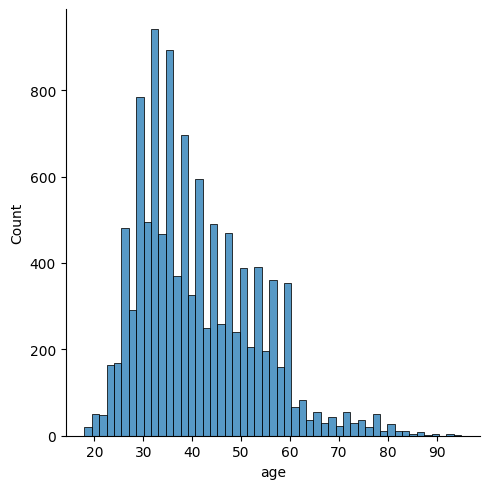

In [21]:
# remove outliers in age, balance, previous columns
# check outliers of age
sns.displot(df, x="age")

In [22]:
# let's remove everything that is considered as outliers
df = df.query("age > age.quantile(0.05) and age < age.quantile(0.75)")

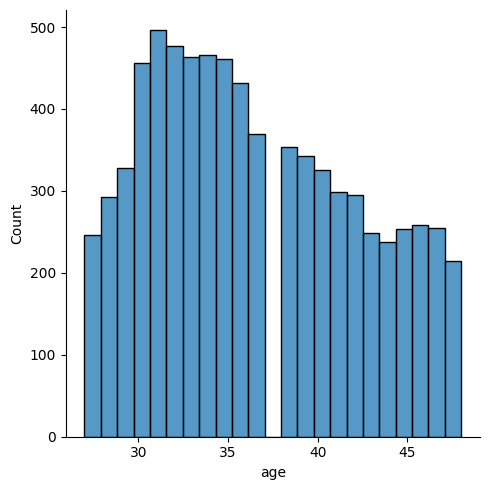

In [23]:
# data is not perfecrly balanced but it is better
# than it was before
sns.displot(df, x="age")

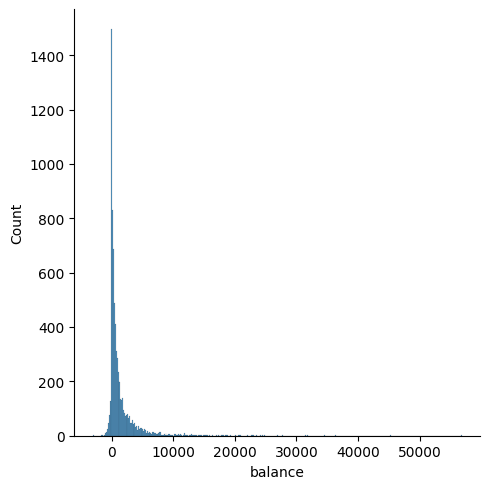

In [24]:
# let's check the balance column
sns.displot(df, x="balance")

In [25]:
# let's remove everything that is considered as outliers
df = df.query("balance > balance.quantile(0.001) and balance < balance.quantile(0.85)")

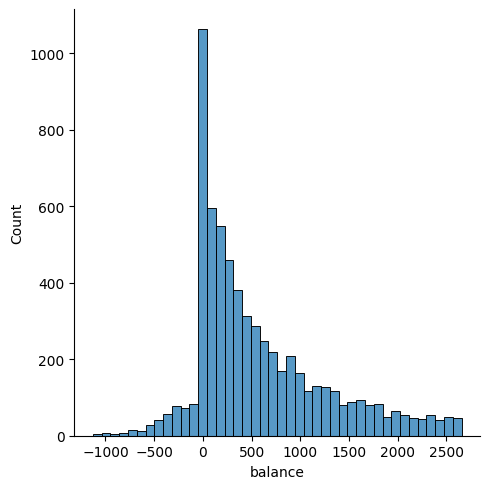

In [26]:
# data is not perfecrly balanced but it is better
# than it was before
sns.displot(df, x="balance")

In [27]:
# let's check the previous column
class_counts = df['previous'].value_counts()
class_counts

0     4849
1      496
2      385
3      238
4      137
5       97
6       69
7       37
8       32
10      17
9       15
11      12
12       8
17       8
13       5
15       4
19       3
14       3
16       2
58       1
22       1
55       1
23       1
30       1
27       1
41       1
18       1
37       1
20       1
Name: previous, dtype: int64

In [28]:
# let's remove outliers
# just a reminder, what "previous" means
# previous --> number of contacts performed before this campaign and for this client (numeric)
df = df.query("previous < previous.quantile(0.96)")

In [29]:
# now we deleted all clients who had
# a numerous amount of calls from the company
# it is an outlier because it can be viewed as
# an exception
class_counts = df['previous'].value_counts()
class_counts

0    4849
1     496
2     385
3     238
4     137
Name: previous, dtype: int64

In [30]:
# Outliers detected using IQR method
# NaN --> no outliers
# Number --> outlier, that is needed to be checked and removed

# to make a fixed heigh and enable vertical scrolling
# otherwise, there was a bug and the whole table was displayed
from IPython.display import display, HTML

# Function to detect outliers using IQR method
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        col_outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)][col]
        outliers = pd.concat([outliers, col_outliers], axis=1)
    return outliers

# Detect outliers using IQR method
outliers_iqr = detect_outliers_iqr(df)

# Display scrollable table
html_outliers_iqr = outliers_iqr.to_html()
display(HTML(f'<div style="height:200px; overflow-y:auto;">{html_outliers_iqr}</div>'))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
30,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# remove outliers in poutcome

In [32]:
# let's check outliers in the "poutcome" column
# # poutcome --> outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"
# poutcome --> failure: 0, other: 1, success: 2, unknown: 3
class_counts = df['poutcome'].value_counts()
class_counts

3    4849
0     611
2     408
1     237
Name: poutcome, dtype: int64

In [33]:
# remove outliers
df = df.query('poutcome >= poutcome.quantile(q=0.2)')

In [34]:
# now we have lees of 
lass_counts = df['poutcome'].value_counts()
class_counts

3    4849
0     611
2     408
1     237
Name: poutcome, dtype: int64

In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,5,562,2,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,5,608,1,-1,0,3,1
10,38,0,2,1,0,100,1,0,2,7,5,786,1,-1,0,3,1
11,30,1,1,1,0,309,1,0,2,7,5,1574,2,-1,0,3,1


In [36]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000,5257.000000
mean,36.413924,4.396994,1.245387,1.295796,0.021305,549.281149,0.537189,0.149515,0.602435,15.940460,6.103862,373.704584,2.705916,12.243485,0.162070,2.922389,0.401940
std,5.869317,3.361878,0.627783,0.696676,0.144413,676.417829,0.498663,0.356629,0.894245,8.463755,2.336564,362.562261,3.013079,54.891297,0.631178,0.267584,0.490337
min,27.000000,0.000000,0.000000,0.000000,0.000000,-1129.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,51.000000,0.000000,0.000000,0.000000,8.000000,5.000000,133.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,36.000000,4.000000,1.000000,1.000000,0.000000,322.000000,1.000000,0.000000,0.000000,16.000000,6.000000,248.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,41.000000,7.000000,2.000000,2.000000,0.000000,882.000000,1.000000,0.000000,2.000000,22.000000,8.000000,508.000000,3.000000,-1.000000,0.000000,3.000000,1.000000
max,48.000000,11.000000,2.000000,3.000000,1.000000,2655.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3284.000000,43.000000,771.000000,4.000000,3.000000,1.000000


In [37]:
# Save the DataFrame to a new CSV file
df.to_csv("bank_numeric.csv", index=False)